In [2]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor, Pool, cv
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

In [3]:
# загружаем набор данных
data = pd.read_csv('C://Users/alex1/Downloads/laptops_train.csv')
data_copy = data.copy()
data_copy.head()
#Посмотрел датафрейм


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [4]:
data_copy['Screen Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [5]:
data_copy.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


<AxesSubplot: >

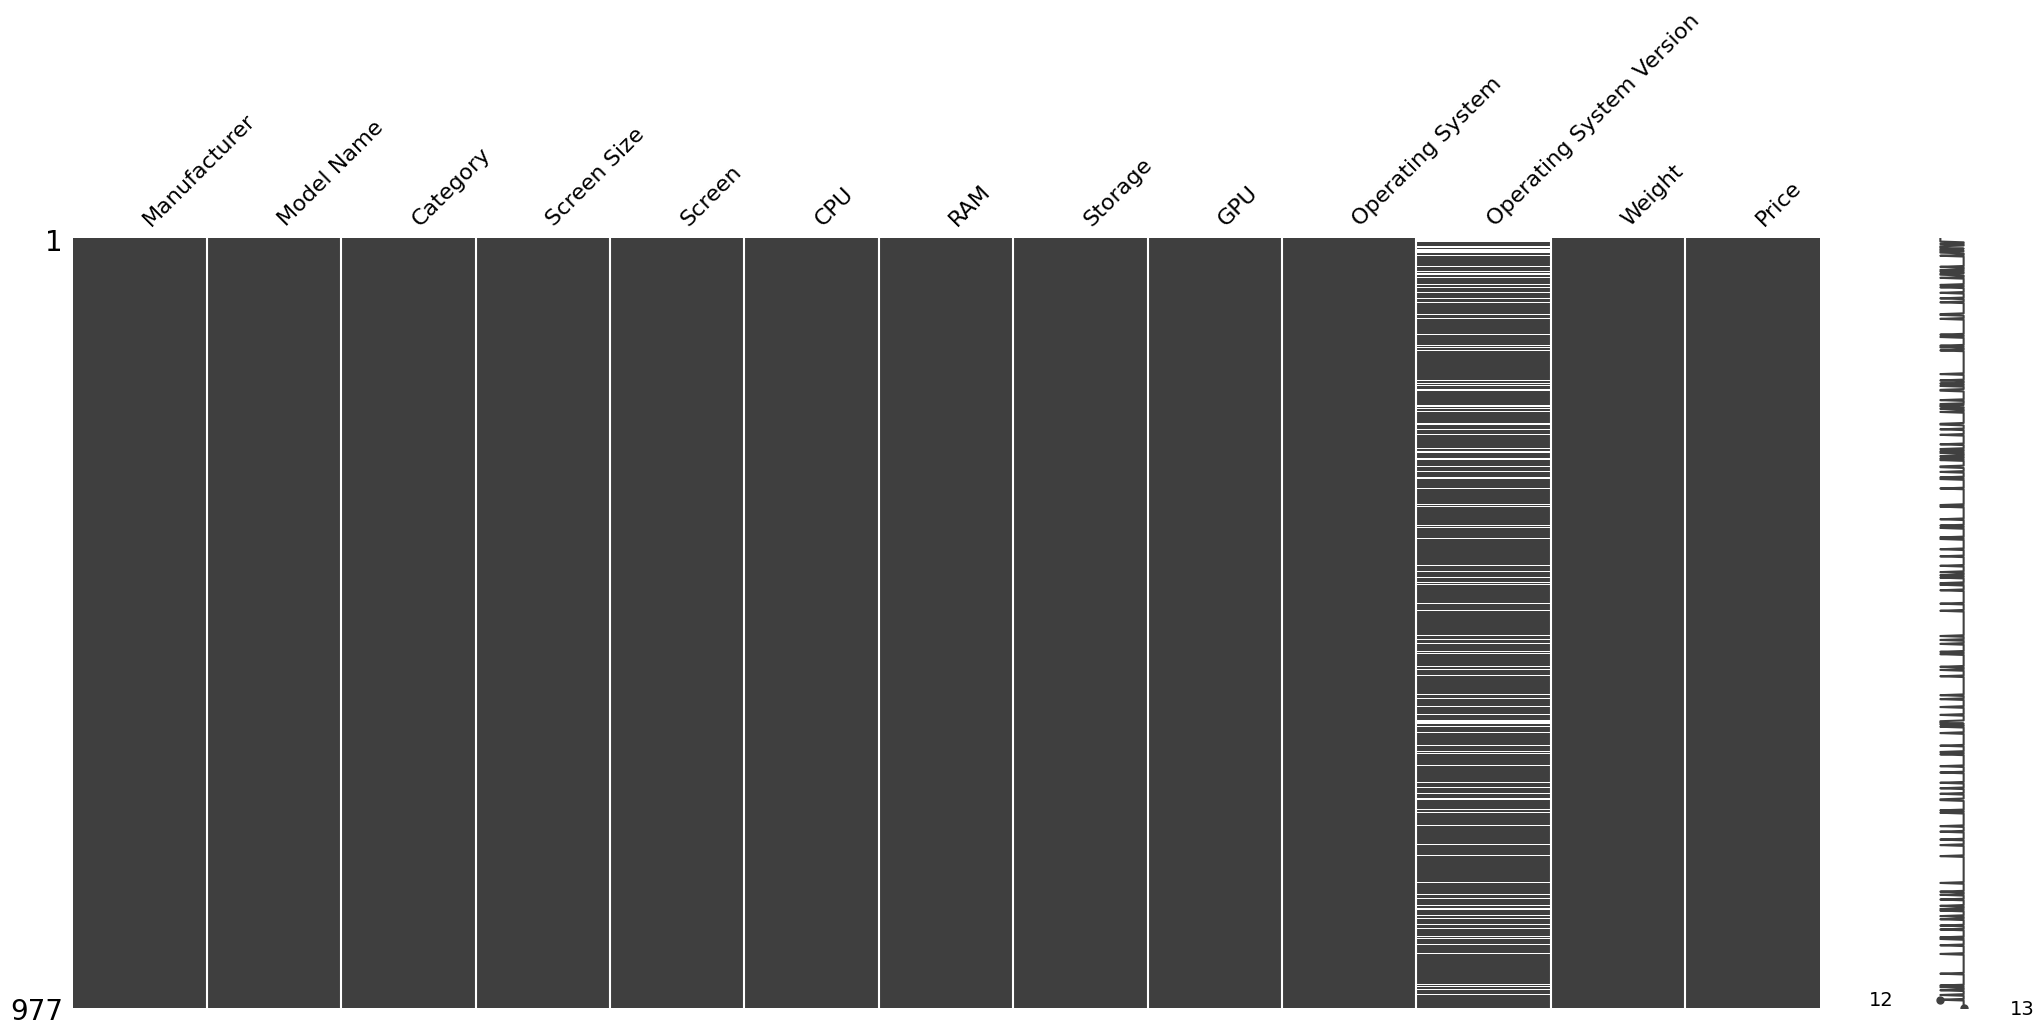

In [8]:
msn.matrix(data_copy)
#построил матрицу Null значений, в стобце operation system version, отсутствуют значения, надо заменить на какое-либо значение,
# потому что от накатанной системы нотбука зависит его цена

In [3]:
data_copy.shape
# удаление дубликатов

(977, 13)

In [4]:
data_copy = data_copy.drop_duplicates()
data_copy.shape
# дубликатов не обнаружено

(977, 13)

In [14]:
unique_values =  pd.unique(data_copy['Operating System Version'])
unique_values

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [68]:
data_copy['Operating System Version'].fillna('0', inplace=True)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  977 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [5]:
def weight(x):
    s = x.replace('kg','')
    return float(s)
def screen(x):
    s = x.replace('"','')
    return float(s)

    

data_copy['Weight'] = data_copy['Weight'].apply(weight)
data_copy['Screen Size'] = data_copy['Screen Size'].apply(screen)

data_enc= pd.get_dummies(data_copy, columns=['Operating System', 'Category', 'RAM','Manufacturer', 'Operating System Version','Storage' ,'Screen Size'])
data_enc

#Применил encoding для столбцов

data_enc



,Model Name,Screen,CPU,GPU,Weight,Price,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,...,Screen Size_13.5,Screen Size_13.9,Screen Size_14.0,Screen Size_14.1,Screen Size_15.0,Screen Size_15.4,Screen Size_15.6,Screen Size_17.0,Screen Size_17.3,Screen Size_18.4
0,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,1.37,11912523.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,1440x900,Intel Core i5 1.8GHz,Intel HD Graphics 6000,1.34,7993374.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,250 G6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,1.86,5112900.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,MacBook Pro,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,AMD Radeon Pro 455,1.83,22563005.40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,1.37,16037611.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Alienware 17,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,Nvidia GeForce GTX 1070,4.42,24897600.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
973,Tecra A40-C-1DF,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,1.95,10492560.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
974,Rog Strix,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1060,2.73,18227710.80,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
975,Probook 450,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,Nvidia GeForce 930MX,2.04,8705268.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#data_enc = data_enc.drop(['Model Name'], axis=1)
def Screen(x):
    s = list(x.split(' '))
    s = s[len(s)-1]
    s = list(map(int,s.split('x')))
    
    return s[0]*s[1]
def CPU(x):
    s = list(x.split(' '))
    s = s[len(s)-1]
    s = list(s.split('G'))
    
    return float(s[0])
def GPU(x):
    s = list(x.split(' '))
    s = s[0]
    
    
    return s
data_enc['Screen'] = data_enc['Screen'].apply(Screen)
data_enc['CPU'] = data_enc['CPU'].apply(CPU)
data_enc['GPU'] = data_enc['GPU'].apply(GPU)
data_enc= pd.get_dummies(data_enc, columns=['GPU'])
data_enc

,Model Name,Screen,CPU,Weight,Price,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,...,Screen Size_14.1,Screen Size_15.0,Screen Size_15.4,Screen Size_15.6,Screen Size_17.0,Screen Size_17.3,Screen Size_18.4,GPU_AMD,GPU_Intel,GPU_Nvidia
0,MacBook Pro,4096000,2.3,1.37,11912523.48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Macbook Air,1296000,1.8,1.34,7993374.48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,250 G6,2073600,2.5,1.86,5112900.00,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,MacBook Pro,5184000,2.7,1.83,22563005.40,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,MacBook Pro,4096000,3.1,1.37,16037611.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Alienware 17,2073600,2.6,4.42,24897600.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
973,Tecra A40-C-1DF,2073600,2.3,1.95,10492560.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
974,Rog Strix,2073600,2.8,2.73,18227710.80,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
975,Probook 450,2073600,2.7,2.04,8705268.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
data_enc

,Model Name,Screen,CPU,Weight,Price,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,...,Screen Size_14.1,Screen Size_15.0,Screen Size_15.4,Screen Size_15.6,Screen Size_17.0,Screen Size_17.3,Screen Size_18.4,GPU_AMD,GPU_Intel,GPU_Nvidia
0,MacBook Pro,4096000,2.3,1.37,11912523.48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Macbook Air,1296000,1.8,1.34,7993374.48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,250 G6,2073600,2.5,1.86,5112900.00,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,MacBook Pro,5184000,2.7,1.83,22563005.40,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,MacBook Pro,4096000,3.1,1.37,16037611.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Alienware 17,2073600,2.6,4.42,24897600.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
973,Tecra A40-C-1DF,2073600,2.3,1.95,10492560.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
974,Rog Strix,2073600,2.8,2.73,18227710.80,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
975,Probook 450,2073600,2.7,2.04,8705268.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


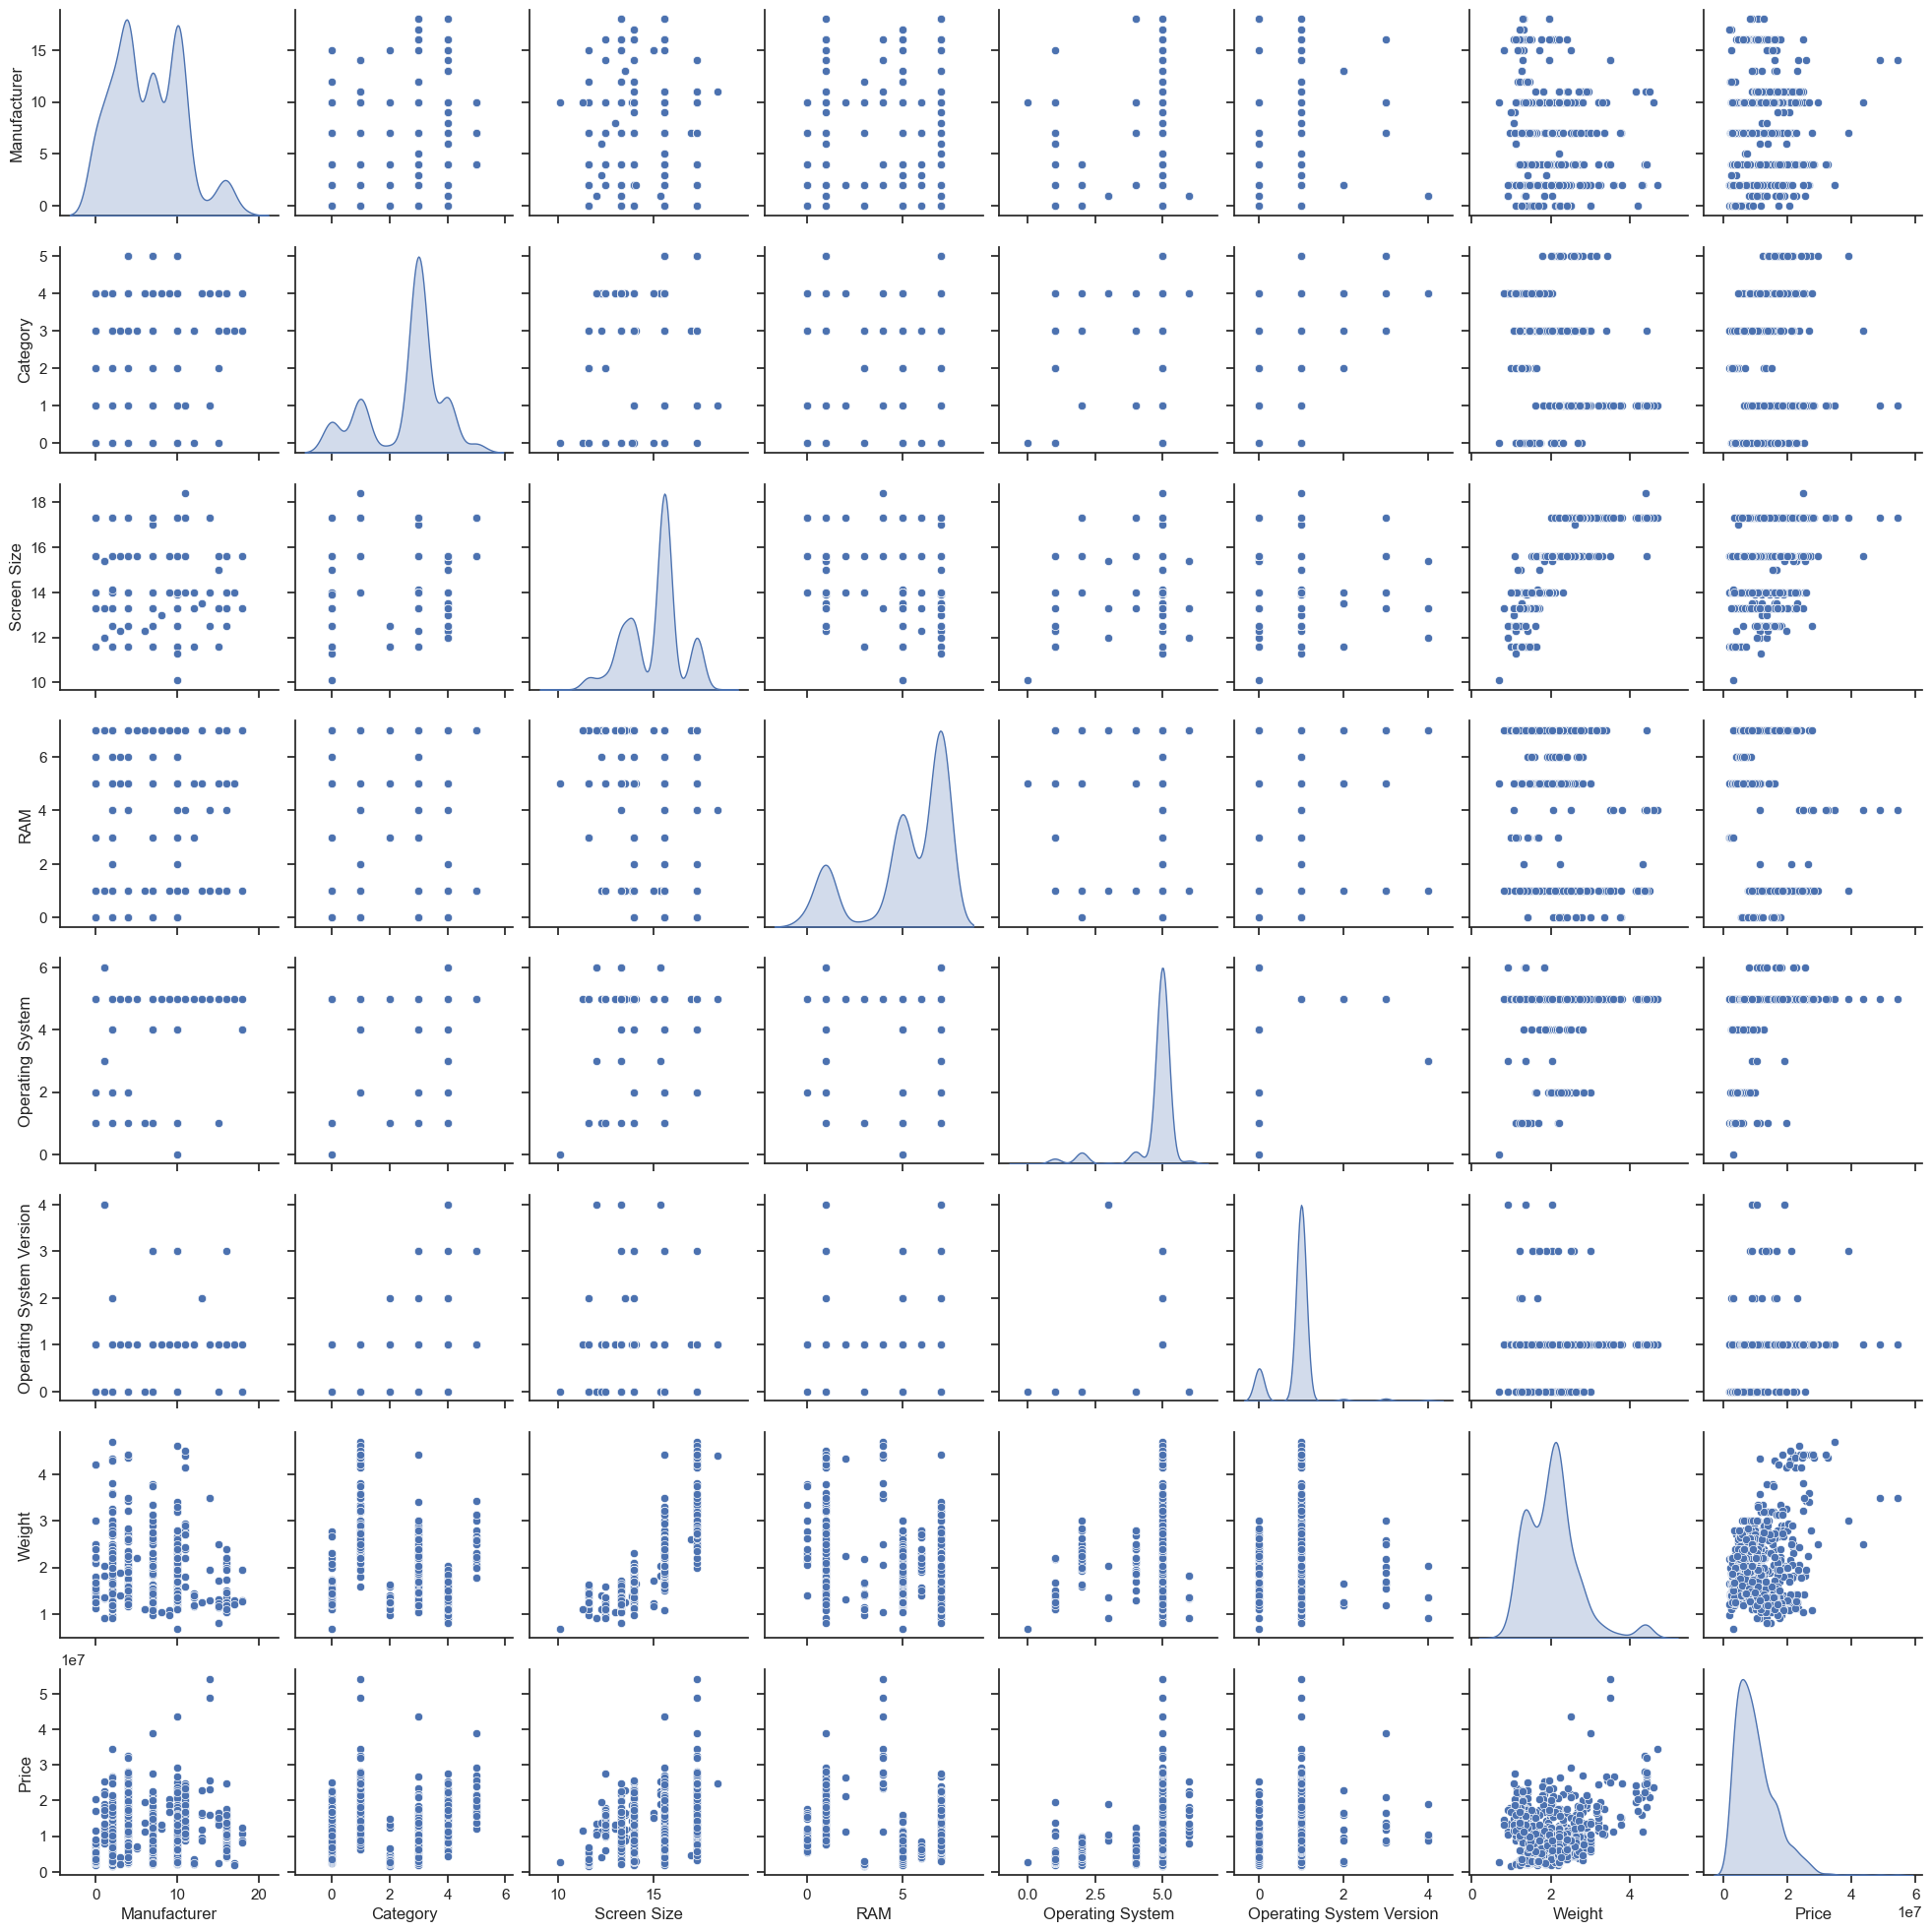

In [37]:
sns.set(style="ticks")
sns.pairplot(data_enc, diag_kind='kde')
plt.show()

In [43]:
cor = data_enc.corr()
cor.style.background_gradient()
# построение корреляционной матрицы


,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price
Manufacturer,1.000000,0.018076,-0.079306,-0.006993,0.140874,-0.087978,-0.128727,0.133153
Category,0.018076,1.000000,-0.059133,0.193144,0.027243,0.076707,-0.262282,-0.119578
Screen Size,-0.079306,-0.059133,1.000000,-0.166649,0.085771,-0.050224,0.822261,0.075152
RAM,-0.006993,0.193144,-0.166649,1.000000,-0.030241,0.059605,-0.256305,-0.333485
Operating System,0.140874,0.027243,0.085771,-0.030241,1.000000,-0.771431,0.042745,0.247003
Operating System Version,-0.087978,0.076707,-0.050224,0.059605,-0.771431,1.000000,-0.049819,-0.210772
Weight,-0.128727,-0.262282,0.822261,-0.256305,0.042745,-0.049819,1.000000,0.224415
Price,0.133153,-0.119578,0.075152,-0.333485,0.247003,-0.210772,0.224415,1.000000


In [58]:
data_enc.describe()
# статистика по каждому столбцу

,Screen Size,Screen,CPU,Weight,Price,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,...,Storage_512GB SSD + 256GB SSD,Storage_512GB SSD + 2TB HDD,Storage_512GB SSD + 512GB SSD,Storage_64GB Flash Storage,Storage_64GB Flash Storage + 1TB HDD,Storage_64GB SSD,Storage_8GB SSD,GPU_AMD,GPU_Intel,GPU_Nvidia
count,977.00000,9.770000e+02,977.000000,977.000000,9.770000e+02,977.000000,977.000000,977.00000,977.000000,977.000000,...,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,15.05261,2.200738e+06,2.284033,2.039128,1.001899e+07,0.001024,0.022518,0.04913,0.004094,0.053224,...,0.001024,0.002047,0.001024,0.009212,0.001024,0.001024,0.001024,0.145343,0.537359,0.317298
std,1.41895,1.411650e+06,0.523576,0.666009,6.306430e+06,0.031993,0.148437,0.21625,0.063887,0.224595,...,0.031993,0.045222,0.031993,0.095584,0.031993,0.031993,0.031993,0.352627,0.498858,0.465663
min,10.10000,1.049088e+06,0.900000,0.690000,1.706375e+06,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.00000,2.073600e+06,1.800000,1.500000,5.326308e+06,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.60000,2.073600e+06,2.500000,2.020000,8.527428e+06,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15.60000,2.073600e+06,2.700000,2.300000,1.311570e+07,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18.40000,8.294400e+06,3.600000,4.700000,5.423231e+07,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data_enc = data_enc.drop(['Model Name'], axis  =1 )

In [9]:
# обучение модели на
X = data_enc.drop("Price", axis=1)  
y = data_enc["Price"]

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score



# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создайте модель градиентного бустинга
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Можете настраивать количество деревьев и другие параметры

# Обучите модель на тренировочных данных
model.fit(X_train, y_train)

# Сделайте прогноз на тестовых данных
y_pred = model.predict(X_test)

# Оцените производительность модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1858802.437375725
R-squared (R2): 0.8088071596011912


In [9]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, verbose=100)

Learning rate set to 0.039375
0:	learn: 6231693.1177929	total: 147ms	remaining: 2m 26s
100:	learn: 2524053.1874722	total: 302ms	remaining: 2.69s
200:	learn: 2110828.7427765	total: 453ms	remaining: 1.8s
300:	learn: 1901838.1413792	total: 610ms	remaining: 1.42s
400:	learn: 1728557.6235628	total: 774ms	remaining: 1.16s
500:	learn: 1579313.2638632	total: 941ms	remaining: 938ms
600:	learn: 1454386.3685805	total: 1.09s	remaining: 727ms
700:	learn: 1363210.2072450	total: 1.25s	remaining: 534ms
800:	learn: 1282897.4982969	total: 1.41s	remaining: 350ms
900:	learn: 1202394.2676473	total: 1.58s	remaining: 173ms
999:	learn: 1133291.3057464	total: 1.74s	remaining: 0us


In [10]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 10, leaf_size = 20)

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

In [11]:
print('r2_score = ', r2_score(y_test, y_hat))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_hat)))

r2_score =  0.7719252297530613
rmse: 2871600.8700576625


In [12]:

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error

In [18]:
my_model = XGBRegressor(
    n_estimators=2000, 
    learning_rate=0.005, 
    early_stopping_rounds=10
)

my_model.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=False
)

predictions = my_model.predict(X_test)


mae = mean_absolute_error(predictions,y_test)


print("Mean Absolute Error:" , mae)

Mean Absolute Error: 1721216.8462244899


In [15]:
data_enc.to_csv('output_kyrs.csv', index=False)

In [17]:
data_enc.info()

AttributeError: 'H2OFrame' object has no attribute 'info'

In [16]:
h2o.init()
data_enc = h2o.import_file("output_kyrs.csv")
X = data_enc.drop("Price", axis=1)  
y = data_enc["Price"]
model = H2OGradientBoostingEstimator()
model.train(x=X, y=y, training_frame=data_enc)
print(model)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 mins 59 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_alex1_jbln1h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.928 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OTypeError: Argument `y` should be a None | integer | string, got H2OFrame       Price
1.19125e+07
7.99337e+06
5.1129e+06
2.2563e+07
1.60376e+07
3.5568e+06
1.90286e+07
1.03032e+07
1.32935e+07
6.84684e+06
[977 rows x 1 column]


In [ ]:

from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X = data_enc.drop("Price", axis=1)  
y = data_enc["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели с помощью TPOT
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

# Оценка модели на тестовой выборке
score = tpot.score(X_test, y_test)

# Вывод результатов
print("Score:", score)

In [ ]:
!pip install auto_ml

In [13]:
from auto_ml import Predictor
from auto_ml.utils import get_boston_dataset
from auto_ml.utils_models import load_ml_model

df_test = data_enc["Price"]
df_train = data_enc.drop("Price", axis=1)
df_train, df_test = get_boston_dataset()

ml_predictor = Predictor(type_of_estimator='regressor')

ml_predictor.train(df_train)

# Score the model on test data
test_score = ml_predictor.score(df_test, df_test.MEDV)

# auto_ml is specifically tuned for running in production
# It can get predictions on an individual row (passed in as a dictionary)
# A single prediction like this takes ~1 millisecond
# Here we will demonstrate saving the trained model, and loading it again
file_name = ml_predictor.save()

trained_model = load_ml_model(file_name)

# .predict and .predict_proba take in either:
# A pandas DataFrame
# A list of dictionaries
# A single dictionary (optimized for speed in production evironments)
predictions = trained_model.predict(df_test)
print(predictions)

ModuleNotFoundError: No module named 'auto_ml'